# Laboratorio 2: aproximación numérica de derivadas

¡Bienvenidos al segundo laboratorio! 

La clase pasada aprendimos a aproximar derivadas numéricamente utilizando la expansión de Taylor y diferencias finitas. Durante esta sesión, vamos a implementar algunas de las técnicas que vimos en esa clase. Eso si, antes de escribir cualquier línea de código, repasaremos un poco de la teoría. 

## Repaso teoría
### Malla computacional

Digamos que existe una función $f(x)$ cuya expresión no conocemos, pero si sabemos su valor numérico en puntos discretos del dominio $x_i$ para $i=0, 1, 2$. Nuestra misión es encontrar una buena aproximación de la derivada en el punto $x_i$ a partir de la los datos disponibles.

<img src="img/funcion.png"width="300px">

La figura anterior es una representación de esta situación: no tenemos una expresión para la función $f(x)$ (línea punteada), pero si conocemos el valor de $f(x_i)$ en los puntos $x_i$. A partir de esto queremos calcular la derivada $\partial f/\partial x$, que es la pendiente ($m$) de la recta roja (tangente a la curva).

Llamaremos *malla computacional* a la colección de puntos $x_i$, y es ahí donde queremos calcular $\partial f/\partial x$. Para facilitar la discusión, digamos que los puntos $x_i$ están separados una misma distancia $h$, lo que implica que tenemos una *malla regular*.

### Expansion de Taylor

Utilizaremos la expansión de Taylor para encontrar una expresión que aproxime $\partial f/\partial x$ en los puntos $x_i$. Usando solamente los términos de primer orden, la expansión de Taylor nos permite aproximar el valor de $f(x_i+h) = f(x_{i+1})$ a partir de $f(x_i):

\begin{equation}
f(x_{i+1}) \approx f(x_i) + h \left. \frac{\partial f}{\partial x} \right|_{x_i} + O(h²).  
\end{equation}

Despejando, queda

\begin{equation}
\left. \frac{\partial f}{\partial x} \right|_{x_i} \approx \frac{f(x_{i+1}) - f(x_i)}{h} + O(h)
\end{equation}

¿Ven como usamos los valores en $x_i$ y $x_{i+1}$ para calcular la derivada en $x_i$? Esto se conoce como *diferencia adelantada*. Si tomamos el valor en $x_{i-1}$ en vez de $x_{i+1}$ llegamos a la fórmula de *diferencia atrasada*:

\begin{equation}
\left. \frac{\partial f}{\partial x} \right|_{x_i} \approx \frac{f(x_{i}) - f(x_{i-1})}{h} + O(h).
\end{equation}

Otra opción es restar las expansiones de Taylor para $f(x_{i-1})$ y $f(x_{i+1})$, lo que nos lleva a *diferencia centrada*:

\begin{equation}
\left. \frac{\partial f}{\partial x} \right|_{x_i} \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + O(h²).
\end{equation}

¿Se fijaron que el error de la aproximación en diferencias centradas es $O(h²)$? En este caso, el término $\frac{h²}{2}\frac{\partial² f}{\partial x²}$ de la expansión de Taylor se cancela al hacer la resta. Esto implica que con diferencia centrada el error decae con $h²$ a medida que $h$ se hace más chico. Decimos entonces que diferencia centrada es una aproximación de *segundo orden*, mientras que diferencia adelantada y atrasada son de *primer orden*.

<img src="img/diferencia.png"width="300px">

La imagen es una representación gráfica de cada una de las aproximaciones. La pendiente de la recta roja es la derivada aproximada con diferencia atrasada, la pendiente de la recta azul es la aproximación con diferencia adelantada y la negra con diferencia centrada. 

### Derivadas de segundo orden

Consideremos la expansión de Taylor para $f(x)$ evaluados en $x_{i+1}$ y $x_{i-1}$ hasta los términos de segundo orden:

\begin{equation}
f(x_{i+1}) \approx f(x_i) + h \left. \frac{\partial f}{\partial x} \right|_{x_i} + \frac{h²}{2}\left. \frac{\partial² f}{\partial x²} \right|_{x_i} + \frac{h³}{3!}\left. \frac{\partial³ f}{\partial x³} \right|_{x_i} + O(h⁴), \\
f(x_{i-1}) \approx f(x_i) - h \left. \frac{\partial f}{\partial x} \right|_{x_i} + \frac{h²}{2}\left. \frac{\partial² f}{\partial x²} \right|_{x_i} - \frac{h³}{3!}\left. \frac{\partial³ f}{\partial x³} \right|_{x_i} + O(h⁴)
\end{equation}

Para aproximar la primera derivada con diferencia centrada nosotros restamos estas dos expresiones, pero ahora nos conviene sumarlas. Esto nos da:

\begin{equation}
\left. \frac{\partial² f}{\partial x²} \right|_{x_i} \approx \frac{f(x_{i-1}) - 2f(x_i) + f(x_{i+1})}{h²} + O(h²)
\end{equation}

lo que también es una aproximación de segundo orden (el error cae con $h²$).

## Problema: Aproximación de la derivada de $\arctan (x)$

Para probar las técnicas que aprendimos en clase, vamos a aproximar las derivadas de la función $\arctan (x)$ en puntos entre -10 y 10, y con diferentes valores de $h$.

### Preparando la solución

Partamos importando algunas librerías: `numpy` contiene operaciones sobre arreglos que son muy útiles, y `pyplot` de `matplotlib` nos permitirá graficar nuestros resultados. La línea que dice `%matplotlib inline` es requerida por IPython Notebooks para mostrar las imágenes de `matplotlib`, sin embargo, no es necesaria en el caso que hagan el código en un archivo de texto aparte. La función `rcParams` controla la tipografía en las imágenes generadas por `matplotlib`.

In [16]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Usemos cinco tamaños de malla: $h= 0.5, 0.25, 0.125, $, y generémoslas usando la función [`numpy.arange`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange). Guardemos las mallas en un arreglo bidimensional `X`, donde `X[i]` tiene la malla correspondiente a `h[i]`, para `i=0,1,2,...`. 

Fíjense que cada elemento de `X` es un arreglo con diferentes dimensiones. La forma más fácil de lidiar con esto es inicializándolo con la función [`numpy.empty`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.empty.html).

In [17]:
h = numpy.array([0.5, 0.25, 0.125, 0.0625, 0.03125, 0.03125/2.])
x_start = -10.
x_end   =  10.

X = numpy.empty(len(h), dtype=object)
for i in range(len(h)):
    X[i] = numpy.arange(x_start, x_end+h[i], h[i])

Aseguremonos que está todo bien: deben ser puntos equidistantes entre -10 y 10

In [18]:
for i in range(len(h)):
    print ('\nMalla para h[%i]=%1.3f'%(i,h[i]))
    print (X[i])


Malla para h[0]=0.500
[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5  10. ]

Malla para h[1]=0.250
[-10.    -9.75  -9.5   -9.25  -9.    -8.75  -8.5   -8.25  -8.    -7.75
  -7.5   -7.25  -7.    -6.75  -6.5   -6.25  -6.    -5.75  -5.5   -5.25  -5.
  -4.75  -4.5   -4.25  -4.    -3.75  -3.5   -3.25  -3.    -2.75  -2.5
  -2.25  -2.    -1.75  -1.5   -1.25  -1.    -0.75  -0.5   -0.25   0.     0.25
   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25   2.5    2.75   3.
   3.25   3.5    3.75   4.     4.25   4.5    4.75   5.     5.25   5.5
   5.75   6.     6.25   6.5    6.75   7.     7.25   7.5    7.75   8.     8.25
   8.5    8.75   9.     9.25   9.5    9.75  10.  ]

Malla para h[2]=0.125
[-10.     -9.875  -9.75   -9.625  -9.5    -9.375  -9.25   -9.125  -9.
  -8.875  -8.75   -8.625  -8.5    -8.375

Y ahora calculemos la función $\arctan(x)$ en cada uno de esos puntos. La guardaremos en el arreglo `F`, que tiene la misma estructura que `X`.

In [19]:
F = numpy.empty_like(X)
for i in range(len(h)):
    F[i] = numpy.arctan(X[i])

¿Cómo se ve eso? Acá graficamos `F[0]`, pero intenten con `F[1]`, `F[2]`, `F[3]` y `F[4]` si quieren asegurarse. 

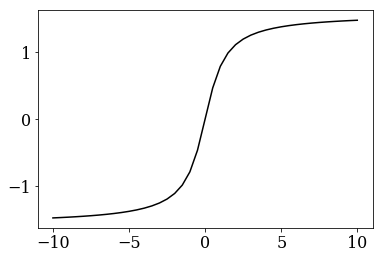

In [20]:
pyplot.plot(X[0], F[0], c='k')


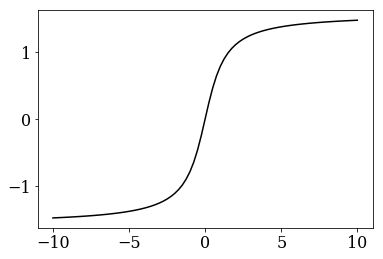

In [21]:
pyplot.plot(X[1], F[1], c='k')


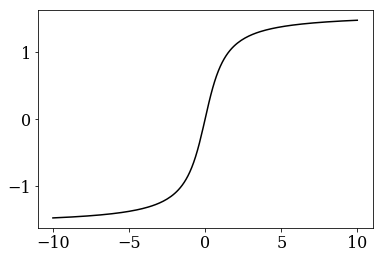

In [22]:
pyplot.plot(X[2], F[2], c='k')

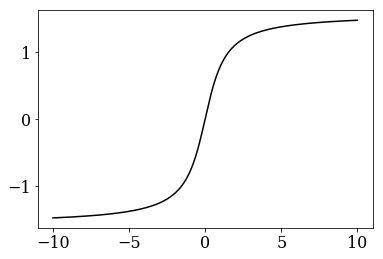

In [23]:
pyplot.plot(X[3], F[3], c='k')

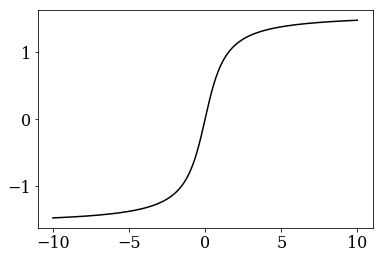

In [24]:
pyplot.plot(X[4], F[4], c='k')

### Acá trabajan ustedes

A continuación, deberán generar funciones que calculen la aproximación de la derivada en cada punto de la malla usando diferencia adelantada, atrasada y centrada, y además calcular la aproximación de la segunda derivada. Para evitar problemas, no calculen la derivada en los extremos ($x=-10$ y $x=10$), ya que necesitarían un valor de $f(x)$ que está fuera del dominio (arreglo) que definimos.

La función debe aproximar $\partial f/\partial x$ para un valor de $h$, y sus datos de entrada son $f(x)$ y $h$ 

In [25]:
### ALUMNO

#def diferencia_adelantada(f,h):
def diferencia_adelantada(f,h):
    dfdx = numpy.zeros(len(f)-2)
    
    for i in range(1, len(f)-1):
        dfdx[i-1] = (f[i+1] - f[i])/h
    return dfdx
#def diferencia_atrasada(f,h):
def diferencia_atrasada(f,h):
    dfdx = numpy.zeros(len(f)-2)
    
    for i in range(1, len(f)-1):
        dfdx[i-1] = (f[i] - f[i-1])/h
    return dfdx
#def diferencia_centrada(f,h):
def diferencia_centrada(f,h):
    dfdx = numpy.zeros(len(f)-2)
    
    for i in range(1, len(f)-1):
        dfdx[i-1] = (f[i+1] - f[i-1])/(2*h)
    return dfdx
#def segunda_derivada(f,h):
def segunda_derivada(f,h):
    dfdx = numpy.zeros(len(f)-2)
    
    for i in range(1, len(f)-1):
        dfdx[i-1] = (f[i-1] - 2*f[i]+f[i+1])/(h*h)
    return dfdx
# Hacer funciones que aproximen la derivada con diferencia 
# adelantada, atrasada, centrada y para la segunda derivada
###

Ahora, usemos sus funciones para aproximar las derivadas con cada método. Las guardaremos en un arreglo 3D: para cada valor de $h$, habrá un arreglo 2D con la información de la siguiente forma:

* Fila 0: diferencia adelantada
* Fila 1: diferencia atrasada
* Fila 2: diferencia centrada
* Fila 3: segunda derivada

Para esto, debemos guardar `f0`, `f1`, `f2` y `f3` en un arreglo 2D también, que llamaremos `F`.

In [26]:
# Inicializamos el arreglo donde guardaremos los resultados
aprox = numpy.empty(len(h), dtype=object)
for i in range(len(h)):
    aprox[i] = numpy.zeros((4,len(F[i])-2))
    
for i in range(len(h)):
    aprox[i][0,:] = diferencia_adelantada(F[i],h[i])
    aprox[i][1,:] = diferencia_atrasada(F[i],h[i])
    aprox[i][2,:] = diferencia_centrada(F[i],h[i])
    aprox[i][3,:] = segunda_derivada(F[i],h[i])

¡Listo! ¿Cómo se ve esta aproximación? Veamos el caso $h=0.125$

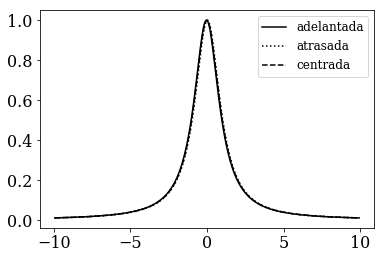

In [27]:
pyplot.plot(X[3][1:-1], aprox[3][0,:], c='k',ls='-',label='adelantada')
pyplot.plot(X[3][1:-1], aprox[3][1,:], c='k',ls=':',label='atrasada')
pyplot.plot(X[3][1:-1], aprox[3][2,:], c='k',ls='--',label='centrada')
pyplot.legend(loc='best',prop={'size':12})

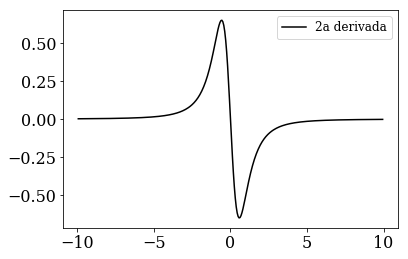

In [28]:
pyplot.plot(X[3][1:-1], aprox[3][3,:], c='k',ls='-',label='2a derivada')
pyplot.legend(loc='best',prop={'size':12})

### Cálculo del error

Para saber que tan buenas son estas aproximaciones, necesitamos calcular el error. Afortunadamente, podemos calcular las derivadas de $\arctan(x)$. A continuación, escriban una función para calcular $\partial \arctan(x)/\partial x$ en los mismos puntos donde calcularon la aproximación con diferencias finitas. Acuérdense que no calcularon la derivada en los extremos ($x=-10$ y $x=10$).

In [29]:
###ALUMNO
#def dfdx_analitico(x):
def dfdx_analitico(x):
    x_matematico= x[1:-1]
    dfdx= 1/(1+x_matematico**2)
    return dfdx
#def ddfdxx_analitico(x):
def ddfdxx_analitico(x):
    x_matematico= x[1:-1]
    ddfdxx= -2*x_matematico/(1+x_matematico**2)**2
    return ddfdxx
# Hacer funciones para encontrar la solución analítica
# para cada caso
###

Usando las funciones recién creadas podemos calcular el error en cada punto $x_i$. Un buen promedio de este error es su norma $L_2$ relativa:

\begin{equation}
||e||_2 = \sqrt{\frac{\sum_i(f_{i,aprox}-f_{i,an})²}{\sum_i f_{i,an}²}}
\end{equation}

Generen una función para calcular la norma $L_2$ relativa

In [30]:
###ALUMNO
#def L2_error(f_ap, f_an):
def L2_error(f_ap, f_an):
    e2 = numpy.sqrt(numpy.sum((f_ap-f_an)**2)/numpy.sum(f_an**2))
    return e2
# Hacer funcion para calcular norma L2 del error
###

Usemos estas funciones para ver como se comporta el error con $h$

In [31]:
error_adelantada = numpy.zeros(len(h))
error_atrasada   = numpy.zeros(len(h))
error_centrada   = numpy.zeros(len(h))
error_2aderivada = numpy.zeros(len(h))

for i in range(len(h)):
    
    dfdx   = dfdx_analitico(X[i])
    ddfdxx = ddfdxx_analitico(X[i])
    
    error_adelantada[i] = L2_error(aprox[i][0,:],dfdx)
    error_atrasada[i]   = L2_error(aprox[i][1,:],dfdx)
    error_centrada[i]   = L2_error(aprox[i][2,:],dfdx)
    error_2aderivada[i] = L2_error(aprox[i][3,:],ddfdxx)

Grafiquemos los resultados

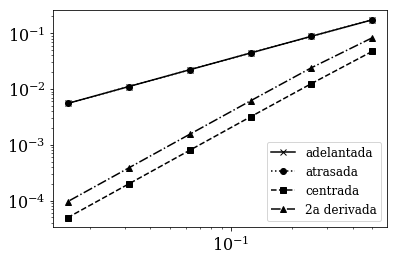

In [32]:
pyplot.loglog(h, error_adelantada, c='k', ls='-', marker='x', label='adelantada')
pyplot.loglog(h, error_atrasada, c='k', ls=':', marker='o', label='atrasada')
pyplot.loglog(h, error_centrada, c='k', ls='--', marker='s', label='centrada')
pyplot.loglog(h, error_2aderivada, c='k', ls='-.', marker='^', label='2a derivada')

pyplot.legend(loc='best',prop={'size':12})

## Conclusiones

Respondan las siguientes preguntas:

1. En una frase, comenten como se relaciona lo que ven en el último gráfico con los términos $O(h)$ y $O(h²)$ de las aproximaciones.
2. Vimos que al afinar la malla, el resultado mejora. Sin embargo, ¿Existe alguna desventaja?
3. Si usamos diferencias centradas, y refinamos la malla en 4 veces, ¿Cuanto debiese disminuir el error de la aproximación?

In [33]:
#1. que el error cae "cuadraticamente más rápido" para los metodos de diferencias centradas y la segunda derivada en comparación 
## a los metodos de diferencias atrasadas y adelantadas
#2. utiza mas recursos (se demora más en hacer el calculo) ya que al tener más pasos-> más puntos -> más cálculos 
#3. 4^2 = 16 deberia disminuir 16 veces